# Analyses of the paper

This notebook is doing the figures and the statistics for the paper. To use this notebook you need forst to create the jsons using `create_json.ipynb`.

In [22]:
import os

if not os.path.isfile("./data_paper/structures.json"):
    print("You need to run the create_json.ipynb first.")
else:
    print("You can continue.")

You can continue.


In [2]:
import json

structures = json.load(open("./data_paper/structures.json"))
fragments = json.load(open("/data1/amoniot/NAfragDB_am2/NAfragDB/fragments_clust.json"))

In [23]:
fragments['AAA']['1']

{'chain': 'B',
 'clust0.2': 1,
 'clust0.2_center': True,
 'clust1.0': 1,
 'clust1.0_center': False,
 'clust3.0': 1,
 'clust3.0_center': False,
 'indices': [1, 2, 3],
 'missing_atoms': [0, 0, 0],
 'model': 1,
 'resid': ['201', '202', '203'],
 'seq': 'GGA',
 'structure': '1A1T'}

results is givieng for each sequence, for each structure, the contact from ss and ds

## Do NMR structures contain more ssRNA than X-ray structures?

Here are simple statistics, the structures.json is parsed, and for each structure, the experimental method is count as x-ray or nmr.

Then a percentage of each method is made and an exact fisher test is performed to know if the results are different or not.

In [19]:
result = {"x-ray":{"ss":0, "ds":0}, "nmr":{"ss":0, "ds":0}}

x = 0
n = 0

for value in structures.values():
    if value["method"] == "x-ray diffraction":
        x += 1
        for chain in value['ss'].values():
            for res in chain.values():
                if res[0] == "D":
                    result["x-ray"]["ds"] += 1
                else:
                    result["x-ray"]["ss"] += 1
    elif value["method"] == "solution nmr" or value["method"] == "solution nmr; theoretical model" or value["method"] == "solid-state nmr":
        n += 1
        for chain in value['ss'].values():
            for res in chain.values():
                if res[0] == "D":
                    result["nmr"]["ds"] += 1
                else:
                    result["nmr"]["ss"] += 1
print(result)
x_per = round((result["x-ray"]['ss']*100/(result["x-ray"]['ss'] + result["x-ray"]['ds'])),2)
rmn_per = round((result["nmr"]['ss']*100/(result["nmr"]['ss']+result["nmr"]['ds'])),2)
print("Percentages ss: X-ray: {}%, NMR: {}%".format(x_per, rmn_per))

import scipy.stats
(oddsratio, pvalue) = scipy.stats.fisher_exact([[result["x-ray"]['ss'], result["nmr"]['ss']], [result["x-ray"]['ds'], result["nmr"]['ds']]])
print("The p-value of the exact fisher test is: {:.3f}".format(pvalue))

{'x-ray': {'ss': 193756, 'ds': 292550}, 'nmr': {'ss': 1229, 'ds': 1976}}
Percentages ss: X-ray: 39.84%, NMR: 38.35%
The p-value of the exact fisher test is: 0.086


## Conformational diversity of RNA fragments at different scales

The first cell is making the figure shwoing the number of element in the clusters at 1A and 3A.

The second cell is showing in details the composition of those clusters, by printing the number od clusters of a given size (number of elements).

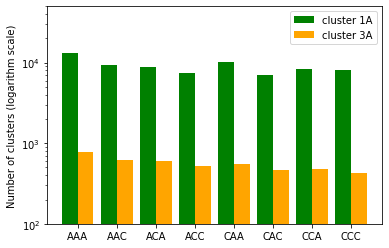

In [46]:
import matplotlib.pyplot as plt
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

motifs = ['AAA', 'AAC', 'ACA', 'ACC', 'CAA', 'CAC', 'CCA', 'CCC']
clust_1A = []
clust_3A = []
for motif in motifs:
    with open("/data1/amoniot/NAfragDB_am2/NAfragDB//trilib/{}-dr0.2r-clust1.0".format(motif)) as ff:
        for n_line_1A, _ in enumerate(ff):
            pass
        clust_1A.append(n_line_1A)
    with open("/data1/amoniot/NAfragDB_am2/NAfragDB//trilib/{}-dr0.2r-clust1.0-clust3.0".format(motif)) as ff3:
        for n_line_3A, _ in enumerate(ff3):
            pass
        clust_3A.append(n_line_3A)
        
plt.bar([1, 2, 3, 4, 5, 6, 7, 8], clust_1A, 0.4, label="cluster 1A", log=True, color='green')
plt.bar([1.4, 2.4, 3.4, 4.4, 5.4, 6.4, 7.4, 8.4], clust_3A, 0.4, label="cluster 3A", log=True, color='orange')
plt.ylabel("Number of clusters (logarithm scale)")
plt.xticks([1.2, 2.2, 3.2, 4.2, 5.2, 6.2, 7.2, 8.2], motifs)
plt.ylim(100, 50000)
plt.legend()
plt.show()

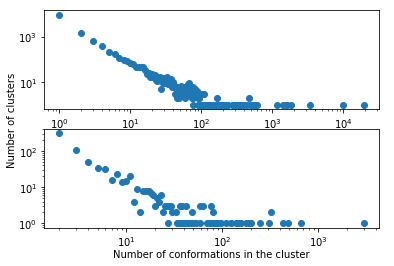

In [47]:
with open("/data1/amoniot/NAfragDB_am2/NAfragDB//trilib/AAA-dr0.2r-clust1.0") as ff_1A:
    lines_1A = ff_1A.readlines()

# Calculation of the size of clusters, results are kept in
# res_1A and res_3A
res_1A = {}
for line_1A in lines_1A:
    line_1A = line_1A.split(' ')
    len_line_1A = len(line_1A) - 4
    if len_line_1A in res_1A.keys():
        res_1A[len_line_1A] += 1
    else:
        res_1A[len_line_1A] = 1
        
with open("/data1/amoniot/NAfragDB_am2/NAfragDB//trilib/AAA-dr0.2r-clust1.0-clust3.0") as ff_3A:
    lines_3A = ff_3A.readlines()

res_3A = {}
for line_3A in lines_3A:
    line_3A = line_3A.split(' ')
    len_line_3A = len(line_3A) - 4
    if len_line_3A in res_3A.keys():
        res_3A[len_line_3A] += 1
    else:
        res_3A[len_line_3A] = 1
        
# Then creation of plots

fig = plt.figure()
ax = fig.add_subplot(111)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.scatter(res_1A.keys(), res_1A.values())
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.yaxis.set_tick_params(labelcolor="black")
ax1.xaxis.set_tick_params(labelcolor="black")
ax2.scatter(res_3A.keys(), res_3A.values())
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.yaxis.set_tick_params(labelcolor="black")
ax2.xaxis.set_tick_params(labelcolor="black")

ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
ax.set_ylabel("Number of clusters", color="black")
ax.set_xlabel("Number of conformations in the cluster", color="black")
#plt.savefig("clusters_indiv_1A.png", facecolor="w", bbox_inches='tight')
plt.show()

## RNA local conformations induced by protein binding

In [3]:
results = {"AAA":{}, "AAC":{}, "ACA":{}, "ACC":{}, "CAA":{}, "CAC":{}, "CCA":{}, "CCC":{}}
res_bis = {"AAA":{}, "AAC":{}, "ACA":{}, "ACC":{}, "CAA":{}, "CAC":{}, "CCA":{}, "CCC":{}}
contact_all = 0
not_contact_all = 0
for key in results.keys():
    for key2 in fragments[key].keys():
        model = "model_" + str(fragments[key][key2]["model"])
        chain = "chain_" + str(fragments[key][key2]["chain"])
        contact = False
        interface = set()
        nucl2=[]
        mapping_rev={}
        for nn in structures[fragments[key][key2]['structure']]["mapping"][chain].keys():
            mapping_rev[structures[fragments[key][key2]['structure']]["mapping"][chain][nn]] = nn
        for nucl in structures[fragments[key][key2]['structure']]["interface_protein"]["model_1"][chain].keys():
            tmp = nucl.split('_')[1]
            interface.add(structures[fragments[key][key2]['structure']]["mapping"][chain][tmp])
        ss=True
        ds=0
        for nucl in fragments[key][key2]['resid']:
            if nucl in interface:
                contact = True
            nucl2.append(mapping_rev[nucl])
        for nucl in nucl2:
            if structures[fragments[key][key2]['structure']]["ss"][chain]["res_"+nucl][0]=="D":
                ss=False
                ds+=1
        if fragments[key][key2]['clust1.0'] not in results[key].keys():
            results[key][fragments[key][key2]['clust1.0']] = {"contact_ss":0, "contact_ds":0, "contact_mixte":0, "nocontact_ss":0, "nocontact_ds":0, "nocontact_mixte":0}
        if contact:
            contact_all += 1
            if ss:
                results[key][fragments[key][key2]['clust1.0']]["contact_ss"] += 1
            elif ds == 3:
                results[key][fragments[key][key2]['clust1.0']]["contact_ds"] += 1
            else:
                results[key][fragments[key][key2]['clust1.0']]["contact_mixte"] += 1
        else:
            not_contact_all += 1
            if ss:
                results[key][fragments[key][key2]['clust1.0']]["nocontact_ss"] += 1
            elif ds == 3:
                results[key][fragments[key][key2]['clust1.0']]["nocontact_ds"] += 1
            else:
                results[key][fragments[key][key2]['clust1.0']]["nocontact_mixte"] += 1
    con_ss = 0
    sum_con_ss = 0
    con_ds = 0
    sum_con_ds = 0
    con_mixte = 0
    sum_con_mixte = 0
    nocon_ss = 0
    sum_nocon_ss = 0
    nocon_ds = 0
    sum_nocon_ds = 0
    nocon_mixte = 0
    sum_nocon_mixte = 0
    mixte_ss = 0
    sum_mixte_ss = 0
    mixte_ds = 0
    sum_mixte_ds = 0
    mixte_mixte = 0
    sum_mixte_mixte=0
    j = 0
    print(key)
    for clust in results[key].keys():
        j += 1
        if results[key][clust]["contact_ss"] + results[key][clust]["contact_ds"] + results[key][clust]["contact_mixte"] + results[key][clust]["nocontact_ss"] + results[key][clust]["nocontact_ds"] + results[key][clust]["nocontact_mixte"] > 2:
            if results[key][clust]["nocontact_mixte"] == 0 and results[key][clust]["nocontact_ds"] == 0 and results[key][clust]["nocontact_ss"] == 0:
                #print(clust, results[key][clust])
                if results[key][clust]["contact_mixte"] > 0:
                    con_mixte += 1
                    sum_con_mixte += results[key][clust]["contact_ss"] + results[key][clust]["contact_ds"] + results[key][clust]["contact_mixte"]
                else:
                    if results[key][clust]["contact_ds"] == 0:
                        con_ss += 1
                        sum_con_ss += results[key][clust]["contact_ss"]
                    else:
                        con_ds += 1
                        sum_con_ds += results[key][clust]["contact_ds"]
            elif results[key][clust]["contact_ss"] == 0 and results[key][clust]["contact_ds"] == 0 and results[key][clust]["contact_mixte"] == 0:
                if results[key][clust]["nocontact_mixte"] > 0:
                    nocon_mixte += 1
                    sum_nocon_mixte += results[key][clust]["nocontact_ss"] + results[key][clust]["nocontact_ds"] + results[key][clust]["nocontact_mixte"]
                else:
                    if results[key][clust]["nocontact_ss"] == 0:
                        nocon_ds += 1
                        sum_nocon_ds += results[key][clust]["nocontact_ds"]
                    else:
                        nocon_ss += 1
                        sum_nocon_ss += results[key][clust]["nocontact_ss"]

            else:
                if results[key][clust]["nocontact_mixte"] > 0 or results[key][clust]["contact_mixte"] > 0 or (results[key][clust]["nocontact_ss"] != 0 and results[key][clust]["nocontact_ds"] !=0) or (results[key][clust]["contact_ss"] != 0 or results[key][clust]["contact_ds"] !=0):
                    mixte_mixte += 1
                    sum_mixte_mixte += results[key][clust]["nocontact_ss"] + results[key][clust]["nocontact_ds"] + results[key][clust]["nocontact_mixte"] + results[key][clust]["contact_ss"] + results[key][clust]["contact_ds"] + results[key][clust]["contact_mixte"]
                else:
                    if results[key][clust]["contact_ss"] == 0 and results[key][clust]["nocontact_ss"] == 0:
                        mixte_ds += 1
                        sum_mixte_ds += results[key][clust]["nocontact_ds"] + results[key][clust]["contact_ds"]
                    else:
                        mixte_ss += 1
                        sum_mixte_ss += results[key][clust]["contact_ss"] + results[key][clust]["nocontact_ss"]             

    res_bis[key] = {"contact_ss":con_ss, "contact_ds":con_ds, "contact_mixte":con_mixte, "nocontact_ss":nocon_ss, "nocontact_ds":nocon_ds, "nocontact_mixte":nocon_mixte, "mixte_ss":mixte_ss, "mixte_ds":mixte_ds, "mixte_mixte":mixte_mixte, \
                   "sum_contact_ss":sum_con_ss, "sum_contact_ds":sum_con_ds, "sum_contact_mixte":sum_con_mixte, \
                   "sum_nocontact_ss":sum_nocon_ss, "sum_nocontact_ds":sum_nocon_ds, "sum_nocontact_mixte":sum_nocon_mixte,\
                   "sum_mixte_ss":sum_mixte_ss, "sum_mixte_ds":sum_mixte_ds, "sum_mixte_mixte":sum_mixte_mixte}
    

AAA
AAC
ACA
ACC
CAA
CAC
CCA
CCC


res_bis is giving a summary of results, giving for each sequence the number of nucleotide ss or ds, and in contact or not

{'chain': 'B', 'clust0.2': 1, 'clust0.2_center': True, 'clust1.0': 1, 'clust1.0_center': False, 'clust3.0': 1, 'clust3.0_center': False, 'indices': [1, 2, 3], 'missing_atoms': [0, 0, 0], 'model': 1, 'resid': ['201', '202', '203'], 'seq': 'GGA', 'structure': '1A1T'}
{'chain': 'B', 'clust0.2': 1, 'clust0.2_center': True, 'clust1.0': 1, 'clust1.0_center': False, 'clust3.0': 1, 'clust3.0_center': False, 'indices': [2, 3, 4], 'missing_atoms': [0, 0, 0], 'model': 1, 'resid': ['202', '203', '204'], 'seq': 'GAC', 'structure': '1A1T'}
{'chain': 'B', 'clust0.2': 1, 'clust0.2_center': True, 'clust1.0': 1, 'clust1.0_center': False, 'clust3.0': 1, 'clust3.0_center': False, 'indices': [7, 8, 9], 'missing_atoms': [0, 0, 0], 'model': 1, 'resid': ['207', '208', '209'], 'seq': 'GCG', 'structure': '1A1T'}
{'chain': 'B', 'clust0.2': 1, 'clust0.2_center': True, 'clust1.0': 1, 'clust1.0_center': False, 'clust3.0': 1, 'clust3.0_center': False, 'indices': [3, 4, 5], 'missing_atoms': [0, 0, 0], 'model': 1, 're

{'AAA': [75.0, 29.82], 'AAC': [70.65, 27.86], 'ACA': [63.51, 27.79], 'ACC': [66.42, 27.44], 'CAA': [57.21, 29.96], 'CAC': [55.76, 27.47], 'CCA': [56.29, 27.15], 'CCC': [62.96, 26.16]}


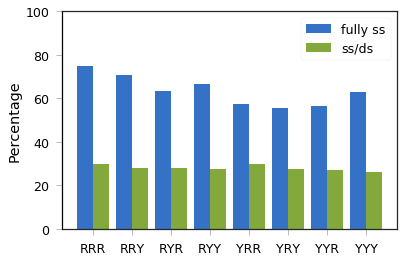

In [153]:
hist={"AAA":[], "AAC":[], "ACA":[], "ACC":[], "CAA":[], "CAC":[], "CCA":[], "CCC":[]}
for key in res_bis.keys():
    hist[key].append(round((100*(res_bis[key]["contact_ss"]/(res_bis[key]["contact_ss"]+res_bis[key]["mixte_ss"]+res_bis[key]["nocontact_ss"]))),2))
    hist[key].append(round((100*((res_bis[key]["contact_mixte"]+res_bis[key]["contact_ds"])/(res_bis[key]["contact_mixte"]+res_bis[key]["mixte_mixte"]+res_bis[key]["nocontact_mixte"]+res_bis[key]["contact_ds"]+res_bis[key]["mixte_ds"]+res_bis[key]["nocontact_ds"]))),2))
    #hist[key].append(round((100*(res_bis[key]["contact_ds"]/(res_bis[key]["contact_ds"]+res_bis[key]["mixte_ds"]+res_bis[key]["nocontact_ds"]))),2))
tick = ["RRR", "RRY", "RYR", "RYY", "YRR", "YRY", "YYR", "YYY"]
print(hist)
a = [row[0] for row in list(hist.values())]
b = [row[1] for row in list(hist.values())]
#c = [row[2] for row in list(hist.values())]
import matplotlib.pyplot as plt
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
fig2 = plt.figure()
ax = plt.subplot(111)
x1= [i-0.2 for i in range(8)]
x2= [i+0.2 for i in range(8)]
#x3= [i+0.2 for i in range(8)]
ax.bar(x1, a, width=0.4, color='b', align='center', label="fully ss")
ax.bar(x2, b, width=0.4, color='g', align='center', label="ss/ds")
#ax.bar(x3, c, width=0.2, color='r', align='center')
ax.xaxis.set_ticks(range(8))
ax.xaxis.set_ticklabels(tick, color="black")
ax.set_ylim(0,100)
ax.yaxis.set_tick_params(labelcolor="black")
plt.ylabel("Percentage", color="black")
legend = plt.legend(loc="upper right")
plt.setp(legend.get_texts(), color="black")
plt.savefig("hist_induced.png")
ax.spines["left"].set_color("black")
plt.savefig("percentage_induced_contact.png", facecolor="w")
plt.show()


In [108]:
res_cluster = {}
for key in results.keys():
    res_cluster[key] = {"ss_con":[], "ss_nocon":[], "ss_mixte":[], "mixte_con":[], "mixte_nocon":[], "mixte_mixte":[], "ds_con":[], "ds_nocon":[], "ds_mixte":[]}
    j = 0
    print(key)
    for clust in results[key].keys():
        j += 1
        if results[key][clust]["contact_ss"] + results[key][clust]["contact_ds"] + results[key][clust]["contact_mixte"] + results[key][clust]["nocontact_ss"] + results[key][clust]["nocontact_ds"] + results[key][clust]["nocontact_mixte"] > 2:
            if results[key][clust]["nocontact_mixte"] == 0 and results[key][clust]["nocontact_ds"] == 0 and results[key][clust]["nocontact_ss"] == 0:
                #print(clust, results[key][clust])
                if results[key][clust]["contact_mixte"] > 0:
                    res_cluster[key]["mixte_con"].append(results[key][clust]["contact_mixte"])
                else:
                    if results[key][clust]["contact_ds"] == 0:
                        res_cluster[key]["ss_con"].append(results[key][clust]["contact_ss"])
                    else:
                        res_cluster[key]["ds_con"].append(results[key][clust]["contact_ds"])
            elif results[key][clust]["contact_ss"] == 0 and results[key][clust]["contact_ds"] == 0 and results[key][clust]["contact_mixte"] == 0:
                if results[key][clust]["nocontact_mixte"] > 0:
                    res_cluster[key]["mixte_nocon"].append(results[key][clust]["nocontact_ss"] + results[key][clust]["nocontact_ds"] + results[key][clust]["nocontact_mixte"])
                else:
                    if results[key][clust]["nocontact_ss"] == 0:
                        res_cluster[key]["ds_nocon"].append(results[key][clust]["nocontact_ds"])
                    else:
                        res_cluster[key]["ss_nocon"].append(results[key][clust]["nocontact_ss"])

            else:
                if results[key][clust]["nocontact_mixte"] > 0 or results[key][clust]["contact_mixte"] > 0 or (results[key][clust]["nocontact_ss"] != 0 and results[key][clust]["nocontact_ds"] !=0) or (results[key][clust]["contact_ss"] != 0 or results[key][clust]["contact_ds"] !=0):
                    res_cluster[key]["mixte_mixte"].append(results[key][clust]["nocontact_ss"] + results[key][clust]["nocontact_ds"] + results[key][clust]["nocontact_mixte"] + results[key][clust]["contact_ss"] + results[key][clust]["contact_ds"] + results[key][clust]["contact_mixte"])
                else:
                    if results[key][clust]["contact_ss"] == 0 and results[key][clust]["nocontact_ss"] == 0:
                        res_cluster[key]["ds_mixte"].append(results[key][clust]["nocontact_ds"] + results[key][clust]["contact_ds"])
                    else:
                        res_cluster[key]["ss_mixte"].append(results[key][clust]["contact_ss"] + results[key][clust]["nocontact_ss"])
    print(j)

AAA
3664
AAC
2788
ACA
2544
ACC
2234
CAA
2969
CAC
2040
CCA
2456
CCC
2805


In [107]:
import scipy.stats as stats
ss = res_cluster["AAA"]["ss_con"] + res_cluster["AAA"]["ss_nocon"] + res_cluster["AAA"]["ss_mixte"]
mixte = res_cluster["AAA"]["ds_con"] + res_cluster["AAA"]["ds_nocon"] + res_cluster["AAA"]["ds_mixte"] + res_cluster["AAA"]["mixte_mixte"] + res_cluster["AAA"]["mixte_con"] + res_cluster["AAA"]["mixte_nocon"]
print(len(ss), sum(ss))
print(len(mixte), sum(mixte))
y = stats.ttest_ind(ss, mixte)
print(y)

304 3817
788 47726
Ttest_indResult(statistic=-1.6229004153907953, pvalue=0.10489985465977537)


In [176]:
from statsmodels.stats.proportion import proportions_ztest

for motif in res_cluster.keys():
    successes = np.array([len(res_cluster[motif]["ss_con"]), len(res_cluster[motif]["ds_con"] + res_cluster[motif]["mixte_con"])])
    samples = np.array([len(ss), len(mixte)])

    stat, p_value = proportions_ztest(count=successes, nobs=samples, alternative='two-sided')

    print(motif, stat, p_value)

AAA 13.540016138351335 9.076897510560595e-42
AAC 8.340693700390009 7.385597464072844e-17
ACA 8.613777478703648 7.069183980920625e-18
ACC 6.058476422948749 1.374168842873341e-09
CAA 4.712287639118331 2.4495129265334907e-06
CAC 6.648542000637444 2.9601051691494453e-11
CCA 5.0019151392689345 5.676357751874521e-07
CCC 11.787554346733515 4.5249056464973593e-32


In [53]:
for key in res_bis.keys():
    sum_tt = res_bis[key]['sum_contact_ss']+res_bis[key]['sum_contact_ds']+res_bis[key]['sum_contact_mixte']+res_bis[key]['sum_nocontact_ss']+res_bis[key]['sum_nocontact_ds']+res_bis[key]['sum_nocontact_mixte']+res_bis[key]['sum_mixte_ss']+res_bis[key]['sum_mixte_ds']+res_bis[key]['sum_mixte_mixte']
    texte = []
    texte.append("\hline")
    texte.append("{} & ss & mixed & ds   & total \\\\ \hline".format(key))
    texte.append("contact   & \cellcolor[RGB]{}255,{},{}{}{} & \cellcolor[RGB]{}255,{},{}{}{}   & \cellcolor[RGB]{}255,{},{}{}{} & \cellcolor[RGB]{}255,{},{}{}{}  \\\\ \hline".format("{", str(round(255-255*res_bis[key]['sum_contact_ss']/sum_tt,0)), str(round(255-255*res_bis[key]['sum_contact_ss']/sum_tt,0)), "}", res_bis[key]['contact_ss'], "{", str(round(255-255*res_bis[key]['sum_contact_mixte']/sum_tt,0)), str(round(255-255*res_bis[key]['sum_contact_mixte']/sum_tt,0)), "}", res_bis[key]['contact_mixte'], "{", str(round(255-255*res_bis[key]['sum_contact_ds']/sum_tt,0)), str(round(255-255*res_bis[key]['sum_contact_ds']/sum_tt,0)), "}", res_bis[key]['contact_ds'],"{", str(round(255-(255*res_bis[key]['sum_contact_ss']/sum_tt+255*res_bis[key]['sum_contact_mixte']/sum_tt+255*res_bis[key]['sum_contact_ds']/sum_tt),0)), str(round(255-(255*res_bis[key]['sum_contact_ss']/sum_tt+255*res_bis[key]['sum_contact_mixte']/sum_tt+255*res_bis[key]['sum_contact_ds']/sum_tt),0)), "}", str(res_bis[key]['contact_ss']+res_bis[key]['contact_mixte']+res_bis[key]['contact_ds'])))
    texte.append("mixed   & \cellcolor[RGB]{}255,{},{}{}{} & \cellcolor[RGB]{}255,{},{}{}{}   & \cellcolor[RGB]{}255,{},{}{}{} & \cellcolor[RGB]{}255,{},{}{}{}  \\\\ \hline".format("{", str(round(255-255*res_bis[key]['sum_mixte_ss']/sum_tt,0)), str(round(255-255*res_bis[key]['sum_mixte_ss']/sum_tt,0)), "}", res_bis[key]['mixte_ss'], "{", str(round(255-255*res_bis[key]['sum_mixte_mixte']/sum_tt,0)), str(round(255-255*res_bis[key]['sum_mixte_mixte']/sum_tt,0)), "}", res_bis[key]['mixte_mixte'], "{", str(round(255-255*res_bis[key]['sum_mixte_ds']/sum_tt,0)), str(round(255-255*res_bis[key]['sum_mixte_ds']/sum_tt,0)), "}", res_bis[key]['mixte_ds'],"{", str(round(255-(255*res_bis[key]['sum_mixte_ss']/sum_tt+255*res_bis[key]['sum_mixte_mixte']/sum_tt+255*res_bis[key]['sum_mixte_ds']/sum_tt),0)), str(round(255-(255*res_bis[key]['sum_mixte_ss']/sum_tt+255*res_bis[key]['sum_mixte_mixte']/sum_tt+255*res_bis[key]['sum_mixte_ds']/sum_tt),0)), "}", str(res_bis[key]['mixte_ss']+res_bis[key]['mixte_mixte']+res_bis[key]['mixte_ds'])))
    texte.append("nocontact   & \cellcolor[RGB]{}255,{},{}{}{} & \cellcolor[RGB]{}255,{},{}{}{}   & \cellcolor[RGB]{}255,{},{}{}{} & \cellcolor[RGB]{}255,{},{}{}{}  \\\\ \hline".format("{", str(round(255-255*res_bis[key]['sum_nocontact_ss']/sum_tt,0)), str(round(255-255*res_bis[key]['sum_nocontact_ss']/sum_tt,0)), "}", res_bis[key]['nocontact_ss'], "{", str(round(255-255*res_bis[key]['sum_nocontact_mixte']/sum_tt,0)), str(round(255-255*res_bis[key]['sum_nocontact_mixte']/sum_tt,0)), "}", res_bis[key]['nocontact_mixte'], "{", str(round(255-255*res_bis[key]['sum_nocontact_ds']/sum_tt,0)), str(round(255-255*res_bis[key]['sum_nocontact_ds']/sum_tt,0)), "}", res_bis[key]['nocontact_ds'],"{", str(round(255-(255*res_bis[key]['sum_nocontact_ss']/sum_tt+255*res_bis[key]['sum_nocontact_mixte']/sum_tt+255*res_bis[key]['sum_nocontact_ds']/sum_tt),0)), str(round(255-(255*res_bis[key]['sum_nocontact_ss']/sum_tt+255*res_bis[key]['sum_nocontact_mixte']/sum_tt+255*res_bis[key]['sum_nocontact_ds']/sum_tt),0)), "}", str(res_bis[key]['nocontact_ss']+res_bis[key]['nocontact_mixte']+res_bis[key]['nocontact_ds'])))
    texte.append("total   & \cellcolor[RGB]{}255,{},{}{}{} & \cellcolor[RGB]{}255,{},{}{}{}   & \cellcolor[RGB]{}255,{},{}{}{} & \cellcolor[RGB]{}255,{},{}{}{}  \\\\ \hline".format("{", str(round(255-(255*res_bis[key]['sum_contact_ss']/sum_tt+255*res_bis[key]['sum_mixte_ss']/sum_tt+255*res_bis[key]['sum_nocontact_ss']/sum_tt),0)), str(round(255-(255*res_bis[key]['sum_contact_ss']/sum_tt+255*res_bis[key]['sum_mixte_ss']/sum_tt+255*res_bis[key]['sum_nocontact_ss']/sum_tt),0)), "}", res_bis[key]['contact_ss']+res_bis[key]['mixte_ss']+res_bis[key]['nocontact_ss'], "{", str(round(255-(255*res_bis[key]['sum_contact_mixte']/sum_tt+255*res_bis[key]['sum_mixte_mixte']/sum_tt+255*res_bis[key]['sum_nocontact_mixte']/sum_tt),0)), str(round(255-(255*res_bis[key]['sum_contact_mixte']/sum_tt+255*res_bis[key]['sum_mixte_mixte']/sum_tt+255*res_bis[key]['sum_nocontact_mixte']/sum_tt),0)), "}", res_bis[key]['contact_mixte']+res_bis[key]['mixte_mixte']+res_bis[key]['nocontact_mixte'], "{", str(round(255-(255*res_bis[key]['sum_contact_ds']/sum_tt+255*res_bis[key]['sum_mixte_ds']/sum_tt+255*res_bis[key]['sum_nocontact_ds']/sum_tt),0)), str(round(255-(255*res_bis[key]['sum_contact_ds']/sum_tt+255*res_bis[key]['sum_mixte_ds']/sum_tt+255*res_bis[key]['sum_nocontact_ds']/sum_tt),0)), "}", res_bis[key]['contact_ds']+res_bis[key]['mixte_ds']+res_bis[key]['nocontact_ds'],"{", str(0), str(0), "}", str(res_bis[key]['contact_ss']+res_bis[key]['contact_mixte']+res_bis[key]['contact_ds']+res_bis[key]['mixte_ss']+res_bis[key]['mixte_mixte']+res_bis[key]['mixte_ds']+res_bis[key]['nocontact_ss']+res_bis[key]['nocontact_mixte']+res_bis[key]['nocontact_ds'])))
    for ii in texte:
        print(ii)

\hline
AAA & ss & mixed & ds   & total \\ \hline
contact   & \cellcolor[RGB]{255,240.0,240.0}228 & \cellcolor[RGB]{255,233.0,233.0}218   & \cellcolor[RGB]{255,254.0,254.0}17 & \cellcolor[RGB]{255,216.0,216.0}463  \\ \hline
mixed   & \cellcolor[RGB]{255,255.0,255.0}0 & \cellcolor[RGB]{255,48.0,48.0}404   & \cellcolor[RGB]{255,255.0,255.0}0 & \cellcolor[RGB]{255,48.0,48.0}404  \\ \hline
nocontact   & \cellcolor[RGB]{255,252.0,252.0}76 & \cellcolor[RGB]{255,249.0,249.0}140   & \cellcolor[RGB]{255,255.0,255.0}9 & \cellcolor[RGB]{255,245.0,245.0}225  \\ \hline
total   & \cellcolor[RGB]{255,236.0,236.0}304 & \cellcolor[RGB]{255,20.0,20.0}762   & \cellcolor[RGB]{255,253.0,253.0}26 & \cellcolor[RGB]{255,0,0}1092  \\ \hline
\hline
AAC & ss & mixed & ds   & total \\ \hline
contact   & \cellcolor[RGB]{255,243.0,243.0}142 & \cellcolor[RGB]{255,236.0,236.0}157   & \cellcolor[RGB]{255,253.0,253.0}11 & \cellcolor[RGB]{255,222.0,222.0}310  \\ \hline
mixed   & \cellcolor[RGB]{255,255.0,255.0}0 & \cellc

## Size of interfaces in protein-bound RNA hairpin loops

In [54]:
with open("/data1/amoniot/NAfragDB_am2/NAfragDB/create_benchmark/queries/rna_contact_ss3_ds3_deredundant2.list") as f:
    lines = f.readlines()
print(len(lines))
lines = list(set(lines))

2642


In [55]:
hairpins = []
for line in lines:
    try:
        tmp = line.rstrip().split()
        tmp[2] = int(tmp[2][2:-2])
        tmp[3] = int(tmp[3][1:-2])
        if len(tmp[-1]) == tmp[3] - tmp[2] + 1:
            hairpins.append(tmp)
    except:
        pass

In [57]:
results_hairpins = {}
for hairpin in hairpins:
    print(hairpin)
    try:
        if hairpin[0] not in results_hairpins.keys():
            results_hairpins[hairpin[0]] = {}
        if structures[hairpin[0]]["method"] == "solution nmr" or structures[hairpin[0]]["resolution"] < 3:
            jj = len(results_hairpins[hairpin[0]].keys())
            results_hairpins[hairpin[0]][jj] = {"contact_ss":0, "contact_ds":0, "nocontact":0}
            chain = "chain_" + hairpin[1]
            interface = set()
            for nucl in structures[hairpin[0]]["interface_protein"]["model_1"][chain].keys():
                tmp = nucl.split('_')[1]
                interface.add(structures[hairpin[0]]["mapping"][chain][tmp])
            for ii in range(hairpin[2], hairpin[3]+1):
                if str(ii) in interface:
                    if int(ii) - hairpin[2] < 3 or hairpin[3] - int(ii) < 3:
                        results_hairpins[hairpin[0]][jj]["contact_ds"] += 1
                    else:
                        results_hairpins[hairpin[0]][jj]["contact_ss"] += 1
                else:
                    results_hairpins[hairpin[0]][jj]["nocontact"] += 1
    except:
        pass

['1IL2', 'D', 1929, 1941, 'CGCUUGUCGCGUG']
['6YBV', 'w', 50, 62, 'UGGAUCGAAACCA']
['3OW2', '0', 134, 144, 'UGCUUCGCGCA']
['3JAP', '1', 29, 41, 'GGUCUCAUAAACC']
['5X8T', 'A', 119, 128, 'AGGUCAACCU']
['1F7V', 'B', 910, 925, 'GCCCAAUGGUCACGGC']
['2Y9H', 'P', 9, 18, 'CACGCGUGUG']
['7BV8B', 'A', 953, 964, 'GGUGCUAACGUC']
['6XE0', 'W', 156, 165, 'CUGGAAACGG']
['6TQA', 'H', 7, 15, 'UAAUAUUUA']
['6QKL', 'N', 3228, 3239, 'GAAGCAGAAUUC']
['6WQN', '1', 754, 767, 'UCAGGUAACACUGA']
['3OW2', '0', 414, 426, 'CAGGCAUCGACUG']
['5OOM', 'A', 1829, 1841, 'AGGACUAACCCCU']
['2OGM', '0', 2504, 2517, 'GGCUGAAGAAGGUC']
['5IT9', 'i', 6139, 6149, 'UGGCAGCCCCA']
['6SPE', 'a', 1348, 1362, 'UGAAUCAGAAUGUCA']
['6X5N', 'r', 12, 22, 'UCGAAACACGA']
['6AZ1', '1', 1913, 1926, 'CUUGAUCAAAAGAG']
['5ONH', 'E', 51, 63, 'GGGUUCAAGUCCC']
['3OW2', '0', 1166, 1180, 'AGCUUAGAAGCAGCU']
['5OOM', 'B', 1628, 1640, 'CAACUUACACUUA']
['6SPB', 'A', 1894, 1910, 'GCCGUAACUAUAACGGU']
['7D1A', 'A', 29, 43, 'UAGUUUAAGGUACUA']
['2DR2', 'B', 51

['1ZBN', 'A', 11, 20, 'GCUCAUUAGC']
['6ZVI', 'e', 52, 64, 'CGGUUCAAAUCCG']
['6TPQ', 'U', 2399, 2408, 'GACGAAAGUC']
['5JVGB', 'X', 336, 348, 'AGGUGAGAGUCCU']
['6NF8', 'A', 629, 638, 'CCUAAAAAGG']
['6XZ7B', 'A', 2793, 2803, 'CCCUUUAAGGG']
['6YSI', '1', 600, 610, 'ACCGUAUAGGG']
['6DZP', 'A', 703, 712, 'CCCGGGUGGG']
['6WRU', '1', 755, 766, 'CAGGUAACACUG']
['5X8R', 'a', 844, 853, 'UUCGCAAGAA']
['1QU3', 'T', 29, 41, 'CCCCUGAUAAGGG']
['7BV8B', 'A', 742, 755, 'AAUGUUGAAAAAUU']
['6QKL', 'N', 2556, 2568, 'CAUCUAAUUAGUG']
['7K5I', '2', 414, 423, 'AAUCAGGGUU']
['7BV8B', 'A', 2526, 2537, 'GCUGAAGUAGGU']
['5XYI', '2', 928, 937, 'ACCGCAAGGC']
['5DM7', 'X', 723, 734, 'CCCGUGACAGGG']
['6DZP', 'A', 857, 870, 'UAGGUUGAAGACUG']
['6SPB', 'A', 2286, 2304, 'GACCGGUCGGAAAUCGGUC']
['6RBE', '2', 701, 737, 'UGGCUAACCUUGAGUCCUUGUGGCUCUUGGCGAACCA']
['7A1G', '2', 1053, 1066, 'GUUUUUUUAAUGAC']
['5X8R', 'a', 1111, 1121, 'GGUGAUAAGCC']
['1S03', 'B', 20, 31, 'UGAGGCAAUUCA']
['6CAS', 'A', 10, 24, 'AGUCUGAUCCUGGCU']
['3P

In [58]:
for key in results_hairpins.keys():
    pop_one = []
    for chain in results_hairpins[key].keys():
        if results_hairpins[key][chain]['contact_ss'] == 0:
            pop_one.append(chain)
    for ii in pop_one:
        results_hairpins[key].pop(ii)

In [63]:
length_contact = {}
for hh in results_hairpins.keys():
    for kk in results_hairpins[hh].keys():
        l = results_hairpins[hh][kk]['contact_ss'] + results_hairpins[hh][kk]["nocontact"] + results_hairpins[hh][kk]["contact_ds"] - 6
        if l in length_contact.keys():
            if results_hairpins[hh][kk]['contact_ss'] in length_contact[l].keys():
                length_contact[l][results_hairpins[hh][kk]['contact_ss']] += 1
            else:
                length_contact[l][results_hairpins[hh][kk]['contact_ss']] = 1
        else:
            length_contact[l]= {}
            length_contact[l][results_hairpins[hh][kk]['contact_ss']] = 1

In [65]:
import numpy as np
x = []
y = []
points_size = []
for ii in length_contact.keys():
    for jj in range(len(list(length_contact[ii].keys()))):
        x.append(ii)
    for kk in length_contact[ii].keys():
        y.append(kk)
        points_size.append(2*length_contact[ii][kk])
print(max(points_size)/2)
z_test = []
for ii in range(len(x)):
    z_test += [x[ii]]*int(points_size[ii]/2)

print(len(z_test), np.median(np.array(z_test)))
print(x, np.median(np.array(x)))
print(y)
print(points_size)

16.0
248 7.0
[7, 7, 7, 7, 7, 7, 7, 5, 5, 5, 5, 5, 8, 8, 8, 8, 8, 8, 8, 4, 4, 4, 4, 6, 6, 6, 6, 6, 9, 9, 9, 9, 9, 9, 13, 13, 13, 3, 3, 10, 10, 10, 10, 10, 12, 12, 12, 14, 11, 15, 15, 16] 8.0
[7, 1, 3, 2, 4, 6, 5, 1, 4, 2, 5, 3, 8, 4, 6, 7, 5, 2, 1, 4, 2, 1, 3, 1, 5, 4, 6, 2, 7, 1, 6, 9, 8, 3, 6, 11, 13, 3, 1, 9, 7, 10, 3, 8, 8, 7, 11, 10, 11, 15, 9, 11]
[32, 10, 14, 16, 22, 8, 20, 10, 22, 10, 30, 6, 8, 4, 6, 6, 2, 4, 4, 30, 22, 16, 26, 8, 12, 8, 16, 8, 10, 16, 4, 8, 4, 2, 2, 2, 2, 16, 4, 6, 2, 14, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2]


In [66]:
%matplotlib

import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor'] = 'white'
fig = plt.figure()
fig.patch.set_facecolor('white')
#fig.patch.set_facecolor("white")
#fig.patch.set_alpha(1.0)
ax = fig.add_subplot(111)
#ax.set_facecolor("white")
#ax.patch.set_alpha(1.0)
plt.scatter(x,y,s=points_size, c="black")
plt.plot([0, 23], [0, 23], 'k-', lw=1)

plt.xlabel("Number of nucleotide in the loop.", color="black")
plt.ylabel("Number of nucleotide in contact\n with the protein in the loop", color="black")

plt.savefig("plot_loop_contact.png")
plt.show()


Using matplotlib backend: agg


## Supplementary

Those are the supplementary data and figures of the paper.

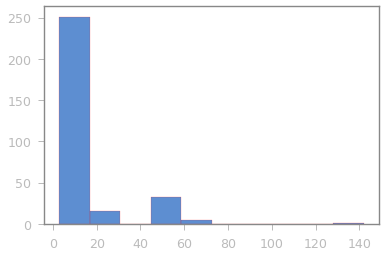

In [128]:
plt.hist(ss, alpha=.8, edgecolor='red')
#plt.hist(mixte, alpha=.7, edgecolor='yellow')
plt.show()

In [88]:
letter = ["A", "U", "G", "C"]
resultats_all = {}
for ii in letter:
    for jj in letter:
        for kk in letter:
            resultats_all[ii+jj+kk] = {}

for key in fragments.keys():
    for key2 in fragments[key].keys():
        model = "model_" + str(fragments[key][key2]["model"])
        chain = "chain_" + str(fragments[key][key2]["chain"])
        seq = fragments[key][key2]['seq']
        contact = False
        interface = set()
        nucl2=[]
        mapping_rev={}
        for nn in structures[fragments[key][key2]['structure']]["mapping"][chain].keys():
            mapping_rev[structures[fragments[key][key2]['structure']]["mapping"][chain][nn]] = nn
        for nucl in structures[fragments[key][key2]['structure']]["interface_protein"]["model_1"][chain].keys():
            tmp = nucl.split('_')[1]
            interface.add(structures[fragments[key][key2]['structure']]["mapping"][chain][tmp])
        ss=True
        ds=0
        for nucl in fragments[key][key2]['resid']:
            if nucl in interface:
                contact = True
            nucl2.append(mapping_rev[nucl])
        for nucl in nucl2:
            if structures[fragments[key][key2]['structure']]["ss"][chain]["res_"+nucl][0]=="D":
                ss=False
                ds+=1
        if fragments[key][key2]['clust1.0'] not in resultats_all[seq].keys():
            resultats_all[seq][fragments[key][key2]['clust1.0']] = {"contact_ss":0, "contact_ds":0, "contact_mixte":0, "nocontact_ss":0, "nocontact_ds":0, "nocontact_mixte":0}
        if contact:
            if ss:
                resultats_all[seq][fragments[key][key2]['clust1.0']]["contact_ss"] += 1
            elif ds == 3:
                resultats_all[seq][fragments[key][key2]['clust1.0']]["contact_ds"] += 1
            else:
                resultats_all[seq][fragments[key][key2]['clust1.0']]["contact_mixte"] += 1
        else:
            if ss:
                resultats_all[seq][fragments[key][key2]['clust1.0']]["nocontact_ss"] += 1
            elif ds == 3:
                resultats_all[seq][fragments[key][key2]['clust1.0']]["nocontact_ds"] += 1
            else:
                resultats_all[seq][fragments[key][key2]['clust1.0']]["nocontact_mixte"] += 1
        

In [89]:
letter = ["A", "U", "G", "C"]
resultats_all_bis = {}
for ii in letter:
    for jj in letter:
        for kk in letter:
            resultats_all_bis[ii+jj+kk] = {}
            
for key in resultats_all.keys():
    con_ss = 0
    sum_con_ss = 0
    con_ds = 0
    sum_con_ds = 0
    con_mixte = 0
    sum_con_mixte = 0
    nocon_ss = 0
    sum_nocon_ss = 0
    nocon_ds = 0
    sum_nocon_ds = 0
    nocon_mixte = 0
    sum_nocon_mixte = 0
    mixte_ss = 0
    sum_mixte_ss = 0
    mixte_ds = 0
    sum_mixte_ds = 0
    mixte_mixte = 0
    sum_mixte_mixte=0
    j = 0
    print(key)
    for clust in resultats_all[key].keys():
        j += 1
        if resultats_all[key][clust]["contact_ss"] + resultats_all[key][clust]["contact_ds"] + resultats_all[key][clust]["contact_mixte"] + resultats_all[key][clust]["nocontact_ss"] + resultats_all[key][clust]["nocontact_ds"] + resultats_all[key][clust]["nocontact_mixte"] > 2:
            if resultats_all[key][clust]["nocontact_mixte"] == 0 and resultats_all[key][clust]["nocontact_ds"] == 0 and resultats_all[key][clust]["nocontact_ss"] == 0:
                #print(clust, results[key][clust])
                if resultats_all[key][clust]["contact_mixte"] > 0:
                    con_mixte += 1
                    sum_con_mixte += resultats_all[key][clust]["contact_ss"] + resultats_all[key][clust]["contact_ds"] + resultats_all[key][clust]["contact_mixte"]
                else:
                    if resultats_all[key][clust]["contact_ds"] == 0:
                        con_ss += 1
                        sum_con_ss += resultats_all[key][clust]["contact_ss"]
                    else:
                        con_ds += 1
                        sum_con_ds += resultats_all[key][clust]["contact_ds"]
            elif resultats_all[key][clust]["contact_ss"] == 0 and resultats_all[key][clust]["contact_ds"] == 0 and resultats_all[key][clust]["contact_mixte"] == 0:
                if resultats_all[key][clust]["nocontact_mixte"] > 0:
                    nocon_mixte += 1
                    sum_nocon_mixte += resultats_all[key][clust]["nocontact_ss"] + resultats_all[key][clust]["nocontact_ds"] + resultats_all[key][clust]["nocontact_mixte"]
                else:
                    if resultats_all[key][clust]["nocontact_ss"] == 0:
                        nocon_ds += 1
                        sum_nocon_ds += resultats_all[key][clust]["nocontact_ds"]
                    else:
                        nocon_ss += 1
                        sum_nocon_ss += resultats_all[key][clust]["nocontact_ss"]

            else:
                if resultats_all[key][clust]["nocontact_mixte"] > 0 or resultats_all[key][clust]["contact_mixte"] > 0 or (resultats_all[key][clust]["nocontact_ss"] != 0 and resultats_all[key][clust]["nocontact_ds"] !=0) or (resultats_all[key][clust]["contact_ss"] != 0 or resultats_all[key][clust]["contact_ds"] !=0):
                    mixte_mixte += 1
                    sum_mixte_mixte += resultats_all[key][clust]["nocontact_ss"] + resultats_all[key][clust]["nocontact_ds"] + resultats_all[key][clust]["nocontact_mixte"] + resultats_all[key][clust]["contact_ss"] + resultats_all[key][clust]["contact_ds"] + resultats_all[key][clust]["contact_mixte"]
                else:
                    if resultats_all[key][clust]["contact_ss"] == 0 and resultats_all[key][clust]["nocontact_ss"] == 0:
                        mixte_ds += 1
                        sum_mixte_ds += resultats_all[key][clust]["nocontact_ds"] + resultats_all[key][clust]["contact_ds"]
                    else:
                        mixte_ss += 1
                        sum_mixte_ss += resultats_all[key][clust]["contact_ss"] + resultats_all[key][clust]["nocontact_ss"]             

    resultats_all_bis[key] = {"contact_ss":con_ss, "contact_ds":con_ds, "contact_mixte":con_mixte, "nocontact_ss":nocon_ss, "nocontact_ds":nocon_ds, "nocontact_mixte":nocon_mixte, "mixte_ss":mixte_ss, "mixte_ds":mixte_ds, "mixte_mixte":mixte_mixte, \
                   "sum_contact_ss":sum_con_ss, "sum_contact_ds":sum_con_ds, "sum_contact_mixte":sum_con_mixte, \
                   "sum_nocontact_ss":sum_nocon_ss, "sum_nocontact_ds":sum_nocon_ds, "sum_nocontact_mixte":sum_nocon_mixte,\
                   "sum_mixte_ss":sum_mixte_ss, "sum_mixte_ds":sum_mixte_ds, "sum_mixte_mixte":sum_mixte_mixte}
    

AAA
AAU
AAG
AAC
AUA
AUU
AUG
AUC
AGA
AGU
AGG
AGC
ACA
ACU
ACG
ACC
UAA
UAU
UAG
UAC
UUA
UUU
UUG
UUC
UGA
UGU
UGG
UGC
UCA
UCU
UCG
UCC
GAA
GAU
GAG
GAC
GUA
GUU
GUG
GUC
GGA
GGU
GGG
GGC
GCA
GCU
GCG
GCC
CAA
CAU
CAG
CAC
CUA
CUU
CUG
CUC
CGA
CGU
CGG
CGC
CCA
CCU
CCG
CCC


In [91]:
for motif in resultats_all_bis.keys():
    print(motif, (resultats_all_bis[motif]["sum_contact_ss"]+resultats_all_bis[motif]["sum_contact_ds"]+resultats_all_bis[motif]["sum_contact_mixte"])/(resultats_all_bis[motif]["sum_contact_ss"]+resultats_all_bis[motif]["sum_contact_ds"]+resultats_all_bis[motif]["sum_contact_mixte"]+resultats_all_bis[motif]["sum_mixte_ss"]+resultats_all_bis[motif]["sum_mixte_ds"]+resultats_all_bis[motif]["sum_mixte_mixte"]+resultats_all_bis[motif]["sum_nocontact_ss"]+resultats_all_bis[motif]["sum_nocontact_ds"]+resultats_all_bis[motif]["sum_nocontact_mixte"]))

AAA 0.2796524550414225
AAU 0.2799347471451876
AAG 0.22372274650178978
AAC 0.20149099192379374
AUA 0.31483578708946774
AUU 0.1837270341207349
AUG 0.1866980885048442
AUC 0.23440795420307323
AGA 0.21806397658373405
AGU 0.23530736320648502
AGG 0.11259079903147699
AGC 0.15516381174122734
ACA 0.261929732564237
ACU 0.10022558814050918
ACG 0.20140721196130168
ACC 0.12569351444423188
UAA 0.14385644768856448
UAU 0.20894736842105263
UAG 0.20995962314939434
UAC 0.18112
UUA 0.1483704974271012
UUU 0.2555746140651801
UUG 0.10229482691559705
UUC 0.16666666666666666
UGA 0.21922626025791325
UGU 0.1316883116883117
UGG 0.12134217713616856
UGC 0.14733369983507422
UCA 0.19263759828448893
UCU 0.10160734787600459
UCG 0.21428571428571427
UCC 0.11023985239852399
GAA 0.211905108426721
GAU 0.25925036040365207
GAG 0.16661790520772382
GAC 0.21008559732043172
GUA 0.165375854214123
GUU 0.10122699386503067
GUG 0.1502260927817786
GUC 0.14708540442837778
GGA 0.14081249096429088
GGU 0.0881766600214691
GGG 0.0855581770768

In [59]:
print(len(hairpins))
i = 0
for key in results_hairpins.keys():
    for chain in results_hairpins[key].keys():
        i += 1
        if results_hairpins[key][chain]['contact_ss'] + results_hairpins[key][chain]['nocontact'] + results_hairpins[key][chain]['contact_ds'] - 6 > 14:
            res = []
            for line in hairpins:
                if line[0] == key:
                    res.append(line)
            print(results_hairpins[key][chain]['contact_ss'], res[chain])
print(i)

1136
15 ['6DU4', 'B', 5, 25, 'GGCGUAGGCUACAGAGAAGCC']
9 ['2ANR', 'B', 203, 223, 'CGCGGAUCAGUCACCCAAGCG']
11 ['6RTIB', 'X', 13, 34, 'GACCUGACUUCUAUACUAAGUC']
248


In [60]:
print(len(hairpins))
j = 0
i = 0
for key in results_hairpins.keys():
    for chain in results_hairpins[key].keys():
        boole = False
        bool_l = False
        for line in hairpins:
            if results_hairpins[key][chain]['contact_ss'] + results_hairpins[key][chain]['nocontact'] + results_hairpins[key][chain]['contact_ds']- 6 <= 6:
                bool_l = True
                if line[0] == key and len(line[-1]) - 6 == results_hairpins[key][chain]['contact_ss']:
                    res.append(line)
                    boole = True
        if boole:
            i+= 1
        if bool_l:
            j+= 1
            
print(i, j)

1136
60 122


In [61]:
#print(structures["1XMQ"]["mapping"]["chain_A"])
for key in structures["5IT9"]["ss"]["chain_i"].keys():
    try:
        if int(structures["5IT9"]["mapping"]["chain_i"][key.split('_')[1]]) < 6198 and int(structures["5IT9"]["mapping"]["chain_i"][key.split('_')[1]]) > 6178:
            print(int(structures["5IT9"]["mapping"]["chain_i"][key.split('_')[1]]),structures["5IT9"]["ss"]["chain_i"][key])
    except:
        pass

6179 ['D', 150, 185]
6180 ['D', 151, 185]
6181 ['D', 0, 0]
6182 ['L', 2, 13]
6183 ['L', 3, 13]
6184 ['L', 4, 13]
6185 ['L', 5, 13]
6186 ['L', 6, 13]
6187 ['L', 7, 13]
6188 ['L', 8, 13]
6189 ['L', 9, 13]
6190 ['L', 10, 13]
6191 ['L', 11, 13]
6192 ['L', 12, 13]
6193 ['L', 13, 13]
6194 ['L', 14, 13]
6195 ['D', 0, 0]
6196 ['D', 167, 185]
6197 ['D', 168, 185]


In [62]:
for key in structures["3PIP"]["ss"]["chain_X"].keys():
    try:
        if int(structures["3PIP"]["mapping"]["chain_X"][key.split('_')[1]]) < 188 and int(structures["3PIP"]["mapping"]["chain_X"][key.split('_')[1]]) > 162:
            print(int(structures["3PIP"]["mapping"]["chain_X"][key.split('_')[1]]),structures["3PIP"]["ss"]["chain_X"][key])
    except:
        pass

163 ['D', 163, 2644]
164 ['D', 164, 2644]
165 ['D', 0, 0]
166 ['L', 2, 19]
167 ['L', 3, 19]
168 ['L', 4, 19]
169 ['L', 5, 19]
170 ['L', 6, 19]
171 ['L', 7, 19]
172 ['L', 8, 19]
173 ['L', 9, 19]
174 ['L', 10, 19]
175 ['L', 11, 19]
176 ['L', 12, 19]
177 ['L', 13, 19]
178 ['L', 14, 19]
179 ['L', 15, 19]
180 ['L', 16, 19]
181 ['L', 17, 19]
182 ['L', 18, 19]
183 ['L', 19, 19]
184 ['L', 20, 19]
185 ['D', 0, 0]
186 ['D', 186, 2644]
187 ['D', 187, 2644]


In [14]:
for hh in results_hairpins.keys():
    for kk in results_hairpins[hh].keys():
        #if results_hairpins[hh][kk]['nocontact'] + results_hairpins[hh][kk]['contact_ds'] -6> 0:
        for line in hairpins:
            res = []
            if line[0] == hh:
                res.append(line)
            if kk < len(res):
                print(res[kk])
        #    for hairpin in hairpins:
         #       if hairpin[0] == hh:
          #          print(hairpin)

['6YS3', 'b', 303, 314, 'GUCUGGAAAGGC']
['6YS3', 'b', 1450, 1465, 'GGGCGACGGUUGUCCC']
['6YS3', 'b', 2305, 2319, 'CUGGUCGGACAUCAG']
['6YS3', 'b', 2797, 2807, 'CUCCUUGAGAG']
['6YS3', 'b', 1531, 1544, 'GGCACUACGGUGCU']
['6YS3', 'b', 1170, 1183, 'GACGCUUAUGCGUU']
['6YS3', 'v', 50, 62, 'GGGUUCGAUUCCC']
['6YS3', 'b', 2211, 2221, 'CCCUGAUCGGG']
['5Y58', 'Z', 295, 307, 'GAUGGCUAAAAUC']
['3OW2', '0', 491, 501, 'CCUCAGAAGGG']
['3OW2', '0', 2387, 2401, 'UCUUCCCAACGAGGA']
['3OW2', '0', 2874, 2883, 'GAGGUAACGA']
['3OW2', '0', 1703, 1715, 'GGCGGCGAAAGCC']
['3OW2', '0', 2778, 2796, 'AGCUGAACGCAUCUAAGCU']
['3OW2', '0', 2735, 2744, 'UUCGAGAGAG']
['3OW2', '0', 250, 259, 'CCCUCACGGG']
['3OW2', '0', 388, 401, 'GGGUUGGAUAUCCC']
['3OW2', '0', 1466, 1476, 'CCGCAACUCGA']
['3OW2', '0', 1385, 1397, 'GGGUGAGAACCCC']
['3OW2', '0', 1791, 1801, 'UCCGGAACGGA']
['3OW2', '0', 1324, 1333, 'GGUGAAAACU']
['3OW2', '0', 1496, 1509, 'GGGUUAAUAUUCCC']
['3OW2', '0', 2504, 2516, 'AGAGCACAUAUCG']
['3OW2', '0', 215, 225, 'AACCGC

In [67]:
proportion = []
for hairpin in results_hairpins.values():
    for chain in hairpin.values():
        proportion.append(round((chain["contact_ss"]+chain["contact_ds"])/(chain["contact_ss"]+chain["contact_ds"]+chain["nocontact"]), 2))

In [30]:
plt.hist(proportion)
plt.show()

In [32]:
bench_ds_contact = []
for ii in results_hairpins.keys():
    for jj in results_hairpins[ii].keys():
        if results_hairpins[ii][jj]['contact_ds'] < 2:
            k = 0
            for item in hairpins:
                if item[0] == ii:
                    if k == jj:
                        bench_ds_contact.append(item)
                    k += 1
            

In [33]:
bench_ds_contact

[['3OW2', '0', 1988, 2000, 'CGCAUCAGUAGCG'],
 ['3OW2', '0', 2584, 2594, 'GGUUGUUCGCC'],
 ['3OW2', '0', 731, 740, 'UCUUCAAGGG'],
 ['3OW2', '0', 2561, 2572, 'CGUGCAGAAGCG'],
 ['3OW2', '0', 1272, 1284, 'CCACUCAUACUGG'],
 ['6SPB', 'A', 531, 543, 'CCUACUUGUUAGG'],
 ['6YT9', '2', 290, 299, 'UCUGAGAGGA'],
 ['6YT9', '2', 314, 331, 'GGGACUGAGACACGGCCC'],
 ['6YSI', '1', 156, 170, 'CAUGAAUACAUAGUG'],
 ['6YSI', '1', 533, 543, 'ACCUUUGUGGU'],
 ['6YSI', '1', 1436, 1451, 'UGGCGUUGGUUGUCCA'],
 ['6YSI', '1', 630, 640, 'UCUUAAUAGGG'],
 ['6YSI', '1', 1267, 1279, 'GGGUGAAAAACCC'],
 ['6YSI', '1', 2196, 2206, 'CCGUGAUCCGG'],
 ['1QF6', 'B', 29, 41, 'GCAUUCGUAAUGC'],
 ['3BT7', 'C', 50, 64, 'UGUGUUCGAUCCACA'],
 ['6TMF', 'A', 396, 404, 'GGCAACGCC'],
 ['1H4S', 'T', 30, 40, 'CGUUCGGGACG'],
 ['2FK6', 'R', 11, 24, 'CUCAGCAGGUAGAG'],
 ['6XZ7B', 'g', 51, 63, 'GUGUUCGAUCCAC'],
 ['6XZ7B', 'A', 1090, 1101, 'AGCGUAAUAGCU'],
 ['4JXX', 'B', 929, 941, 'GGAUUCUGAUUCC'],
 ['5VOF', 'A', 13, 24, 'GAGAUAAUACUU'],
 ['6F4H', 'F', 